In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\Administrator\\Downloads\\BIDV.csv")
df = df[['Price']]
df = df.dropna()
df = df.reset_index(drop=True)

df

,Price
0,11054.8
1,10574.2
2,9973.4
3,10213.7
4,10153.6
...,...
2467,41000.0
2468,41200.0
2469,41300.0
2470,41800.0


In [3]:
# Chia train test
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [4]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [5]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[43784.99064424 43800.1642355  43815.33782675 43830.51141801
 43845.68500927 43860.85860052 43876.03219178 43891.20578304
 43906.37937429 43921.55296555 43936.72655681 43951.90014806
 43967.07373932 43982.24733058 43997.42092184 44012.59451309
 44027.76810435 44042.94169561 44058.11528686 44073.28887812
 44088.46246938 44103.63606063 44118.80965189 44133.98324315
 44149.1568344  44164.33042566 44179.50401692 44194.67760818
 44209.85119943 44225.02479069]


In [6]:
y_pred = model.predict(np.array(test_data.index).reshape(-1, 1))

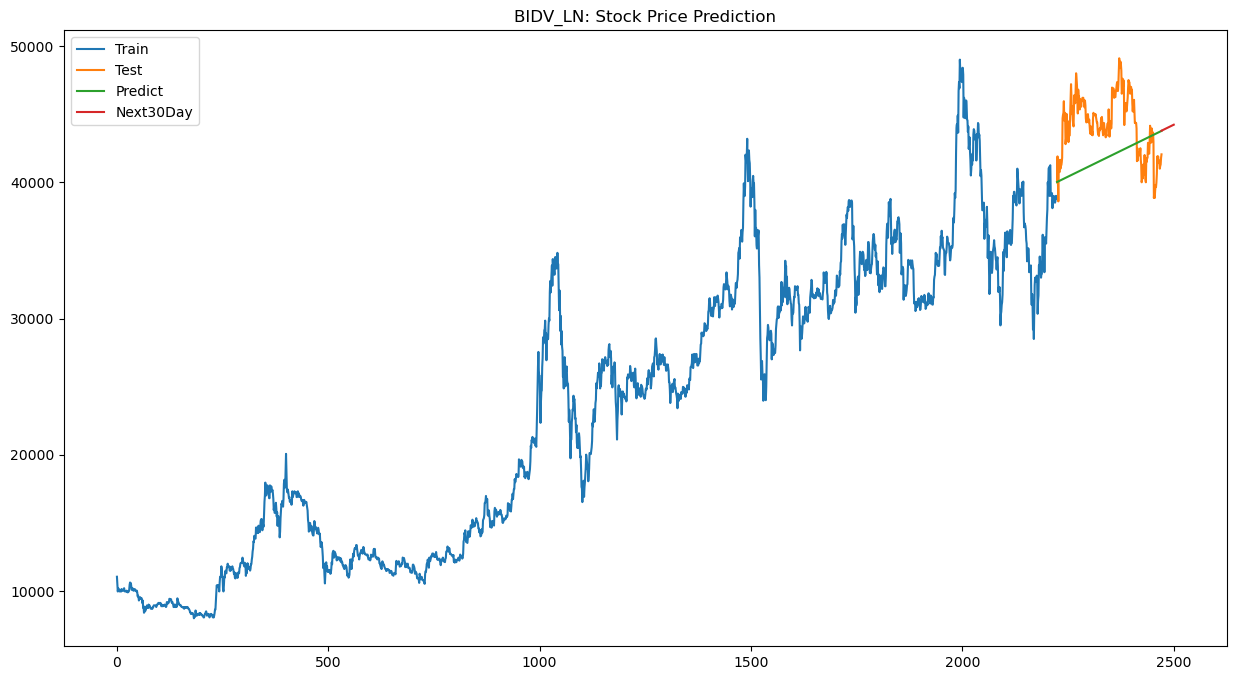

In [7]:
plt.figure(figsize=(15, 8))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predict','Next30Day'])
plt.title('BIDV_LN: Stock Price Prediction')
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, mean_squared_log_error
import numpy as np
# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100
# Tính toán RMSE, MAPE, MDA trên tập test
test_score_rmse=np.sqrt(mean_squared_error(test_data, y_pred))
test_score_mape=mean_absolute_percentage_error(test_data, y_pred) * 100
test_score_mda=calculate_mda(test_data, y_pred)
msle = mean_squared_log_error(test_data, y_pred)
print('RMSE trên tập test là:', test_score_rmse)
print('MAPE trên tập test là:', test_score_mape, '%')
print('MDA trên tập test là:', test_score_mda, '%')
print('MSLE trên tập test là:', msle)

RMSE trên tập test là: 3572.844787874503
MAPE trên tập test là: 7.100541443247904 %
MDA trên tập test là: 0.0 %
MSLE trên tập test là: 0.006744659490073672


C:\Users\Administrator\AppData\Local\Temp\ipykernel_23060\640355832.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
